<a href="https://colab.research.google.com/github/srushtitikekar/srushtitikekar/blob/main/RandomForest_Brightness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into initial labeled data and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.9, random_state=42)

# Initialize a Random Forest classifier (you can use any classifier)
classifier = RandomForestClassifier()

# Train the classifier on the initial labeled data
classifier.fit(X_labeled, y_labeled)

# Active learning loop
num_iterations = 10
batch_size = 5

for _ in range(num_iterations):
    # Predict class probabilities for the unlabeled data
    y_probabilities = classifier.predict_proba(X_unlabeled)

    # Calculate uncertainty scores using the least confident strategy
    uncertainty_scores = 1 - np.max(y_probabilities, axis=1)

    # Select the indices of instances with the highest uncertainty
    selected_indices = np.argsort(uncertainty_scores)[-batch_size:]

    # Add the selected instances to the labeled data
    X_labeled = np.vstack([X_labeled, X_unlabeled[selected_indices]])
    y_labeled = np.concatenate([y_labeled, y_unlabeled[selected_indices]])

    # Remove the selected instances from the unlabeled data
    X_unlabeled = np.delete(X_unlabeled, selected_indices, axis=0)
    y_unlabeled = np.delete(y_unlabeled, selected_indices)

    # Retrain the classifier on the updated labeled data
    classifier.fit(X_labeled, y_labeled)

# Evaluate the final classifier on a test set
X_test, y_test = X_unlabeled, y_unlabeled
accuracy = classifier.score(X_test, y_test)
print("Final Test Accuracy:", accuracy)


Final Test Accuracy: 1.0


In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [26]:
visual_dataset = pd.read_csv('Visual_with_labels.csv')

In [30]:
V1=visual_dataset.to_dict()

In [ ]:
visual_dataset1 = visual_dataset.filter(['Email Id','Age','Education','Gender','Visual Acuity Left','Visual Acuity Right','FOV','Plate_Score','Irelen Score','Sensitive Colors'],axis=1)

In [29]:
type(iris)

sklearn.utils._bunch.Bunch

In [31]:
Brightness = visual_dataset.filter(['M_Brightness'])

In [32]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(visual_dataset1, Brightness, test_size=0.9, random_state=42)

In [33]:
classifier = RandomForestClassifier()

In [34]:
classifier.fit(X_labeled, y_labeled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [39]:
Y_pred = classifier.predict(X_unlabeled)

In [41]:
Y_pred, y_unlabeled

(array([2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3,
        2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2, 2, 3, 3, 3, 3, 3, 1, 2, 3, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2,
        2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2,
        2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
        2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2,
        2]),
      M_Brightness
 139             3
 113             2
 16              2
 75              3
 154             3
 ..            ...
 129             3
 37              3
 157             3
 184             2
 1               1
 
 [177 rows x 1 columns])

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
s = confusion_matrix(y_unlabeled,Y_pred)

In [47]:
s

array([[ 1, 13,  0],
       [ 5, 87,  3],
       [ 0, 32, 36]])

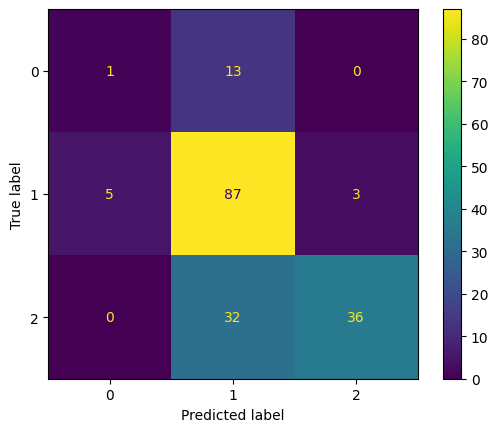

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=s)
disp.plot()
plt.show()

In [38]:
num_iterations = 10
batch_size = 5

for _ in range(num_iterations):
    # Predict class probabilities for the unlabeled data
    y_probabilities = classifier.predict_proba(X_unlabeled)
    print(X_unlabeled)
    print(y_probabilities)
    # Calculate uncertainty scores using the least confident strategy
    uncertainty_scores = 1 - np.max(y_probabilities, axis=1)
    print(uncertainty_scores)
    # Select the indices of instances with the highest uncertainty
    selected_indices = np.argsort(uncertainty_scores)[-batch_size:]
    print(selected_indices)

    # Add the selected instances to the labeled data
    X_labeled = np.vstack([X_labeled, X_unlabeled[selected_indices]])
    y_labeled = np.concatenate([y_labeled, y_unlabeled[selected_indices]])

    # Remove the selected instances from the unlabeled data
    X_unlabeled = np.delete(X_unlabeled, selected_indices, axis=0)
    y_unlabeled = np.delete(y_unlabeled, selected_indices)

    # Retrain the classifier on the updated labeled data
    classifier.fit(X_labeled, y_labeled)

# Evaluate the final classifier on a test set
X_test, y_test = X_unlabeled, y_unlabeled
accuracy = classifier.score(X_test, y_test)
print("Final Test Accuracy:", accuracy)

     Age  Education  Visual Acuity Left  Visual Acuity Right  FOV  \
139   34          4                 150                  108    4   
113   34          2                 108                  125   45   
16    24          5                  25                   50   18   
75    96          4                  60                  150   94   
154   66          0                 200                  150  133   
..   ...        ...                 ...                  ...  ...   
129   86          3                 125                  400   92   
37    20          5                  30                  200  134   
157   30          0                 400                   25   28   
184   28          0                  65                   25  130   
1     80          5                  20                   30   72   

     Plate_Score  Irelen Score  Sensitive Colors  
139            8             0                 1  
113            8             1                 2  
16             8  

KeyError: ignored